# 1.连通度
- 文字部分来自GPT-4<br>
![](./assets/2023-09-03-21-54-26.png)

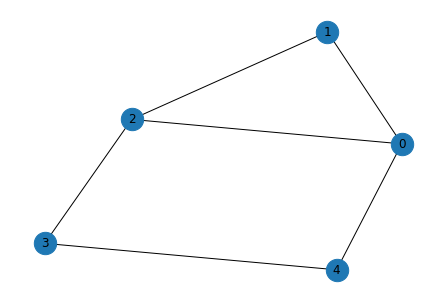

In [58]:
import networkx as nx
import matplotlib. pyplot as plt
# 创建一个无向图
G = nx.Graph()
# 添加边
G.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 4), (4, 0), (0, 2)])
# # 绘制图形
nx.draw(G,node_size=500,with_labels=True)

## 1.1 检查图是否连通

In [59]:
# 检查图是否连通
is_connected = nx.is_connected(G)
print(f"The graph is connected: {is_connected}")

The graph is connected: True


## 1.2 检查有向图是否为强连通

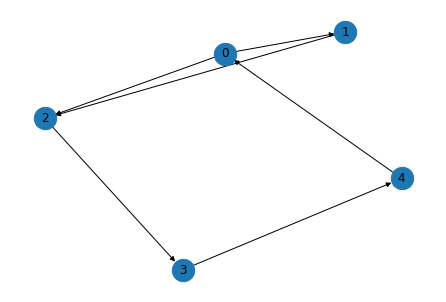

In [60]:
# 创建一个有向图
DG = nx.DiGraph()
DG.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 4), (4, 0), (0, 2)])
nx.draw(DG,node_size=500,with_labels=True)

In [61]:
# 检查图是否强连通
is_strongly_connected = nx.is_strongly_connected(DG)
print(f"The directed graph is strongly connected: {is_strongly_connected}")

The directed graph is strongly connected: True


## 1.3 点连通度、边连通度：
![](./assets/2023-09-03-22-03-39.png)

In [62]:
# 计算点连通度
node_connectivity = nx.node_connectivity(G)
print("节点连通度：", node_connectivity)
# 计算边连通度
edge_connectivity = nx.edge_connectivity(G)
print("边连通度：", edge_connectivity)

节点连通度： 2
边连通度： 2


# 2.网络效率
![](./assets/2023-09-03-22-08-11.png)
## 2.1全局效率
![](./assets/2023-09-03-22-09-09.png)

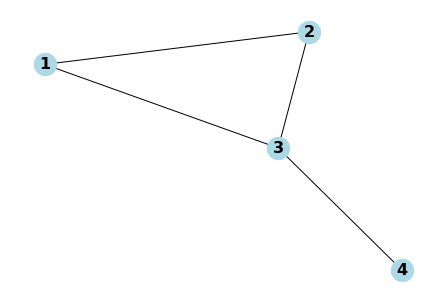

In [63]:
# 创建一个简单的无向图
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4])
G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4)])

# 绘制图形
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=16, font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=12, font_color='red')
plt.show()

In [64]:
#计算指定节点对之间的效率：节点之间最短路径的倒数
nx.efficiency(G,2,4)  # 2,4 之间的最短路径长度为2,则两节点之间的效率为1/2

0.5

In [65]:
# 全局网络效率官方函数
nx.global_efficiency(G)

0.8333333333333334

In [66]:
# 源码
def global_effi(G):
    n = len(G)
    denom =  n * (n - 1)
    if denom != 0:
        lengths = nx.all_pairs_dijkstra_path_length(G)
        g_eff = 0
        for source, targets in lengths:
            for target, distance in targets.items():
                if distance > 0:
                    g_eff += 1 / distance
        g_eff /= denom
        # g_eff = sum(1 / d for s, tgts in lengths
        #                   for t, d in tgts.items() if d > 0) / denom
    else:
        g_eff = 0
    # path lengths in parallel.
    return g_eff

global_effi(G=G)

0.8333333333333334

## 2.2 局部效率

### 2.2.1 查找子图
![](./assets/2023-09-03-22-18-28.png)


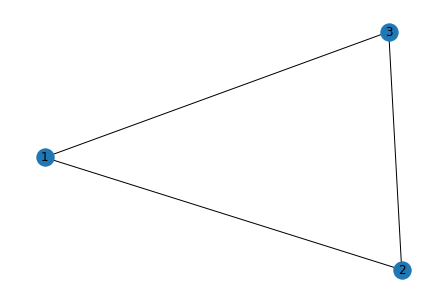

In [67]:
# 定义要查找的节点子集
node_subset = [1, 2, 3]
# 查找诱导子图
induced_subgraph = G.subgraph(node_subset)
nx.draw(induced_subgraph,with_labels = True)

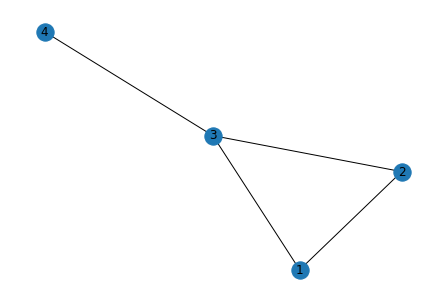

In [68]:
# 查找生成子图
spanning_subgraph = G.subgraph(G.nodes())
nx.draw(spanning_subgraph,with_labels = True)

### 2.2.3 局部效率源码分析

In [69]:
nx.local_efficiency(G) 

0.5833333333333334

In [70]:
# 源码
sum = 0  # 初始化 ，所有节点和其构成的子图 ，对应的全局效率的值
len(G)  # G的节点数

for v in G:  # 遍历每个节点
    print('---{}节点的子图是----'.format(v))
    # 找到每个节点的和其邻居构成的子图
    # fig,ax = plt.subplots()
    # nx.draw(G.subgraph(G[v]),with_labels = True,ax=ax)
    g_effi = nx.global_efficiency(G.subgraph(G[v]))
    print('邻居节点{}全局效率为：{}'.format(v,g_effi))
    sum = sum+ g_effi
    
print("local_efficiency",sum/len(G))  #0.9166666666666667
     

---1节点的子图是----
邻居节点1全局效率为：1.0
---2节点的子图是----
邻居节点2全局效率为：1.0
---3节点的子图是----
邻居节点3全局效率为：0.3333333333333333
---4节点的子图是----
邻居节点4全局效率为：0
local_efficiency 0.5833333333333334


# 3.聚类系数（Clustering Coefficient）
![](./assets/2023-09-03-22-22-54.png)
![](./assets/2023-09-03-22-31-21.png)

## 3.1 聚类系统源码分析

In [71]:
# 官方函数
for node in G.nodes():
    c = nx.clustering(G = G,nodes=node)
    print(f"节点 {node} 的聚类系数为 {c}")

节点 1 的聚类系数为 1.0
节点 2 的聚类系数为 1.0
节点 3 的聚类系数为 0.3333333333333333
节点 4 的聚类系数为 0


In [72]:
# 1. 计算节点的k ,ki：
# test_node : 3 
node = 3
# 邻居
neighbors = list(G.neighbors(node))
# 度
k = len(neighbors)
k  # 节点3对应的k为3

3

In [73]:
# 2. ei的计算
neighbors
for i in range(k):
    for j in range(i + 1, k):
        if G.has_edge(neighbors[i], neighbors[j]):
            # print(neighbors[i], neighbors[j])
            triplets += 1
triplets # 节点3对应的ei为3

2

节点的聚类系数

In [74]:
# 计算每个节点的聚类系数
for node in G.nodes():
    # 获取节点的邻居节点
    neighbors = list(G.neighbors(node))
    k = len(neighbors)
    if k < 2:
        # 如果邻居节点数少于 2，聚类系数为 0
        clustering = 0
    else:
        # 计算节点的三元组数量
        triplets = 0
        for i in range(k):
            for j in range(i + 1, k):
                if G.has_edge(neighbors[i], neighbors[j]):
                    triplets += 1
        # 计算聚类系数
        clustering = 2 * triplets / (k * (k - 1))
    print(f"节点 {node} 的聚类系数为 {clustering}")

节点 1 的聚类系数为 1.0
节点 2 的聚类系数为 1.0
节点 3 的聚类系数为 0.3333333333333333
节点 4 的聚类系数为 0


整个网络的聚类系数C

In [75]:
nx.average_clustering(G=G)

0.5833333333333334